In [351]:
# basic data swimming


In [1]:
import pandas as pd
from tqdm import tqdm
import re
from collections import Counter
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt



stopwords_pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')



tqdm.pandas()
pd.set_option('display.max_colwidth', None)

MAX_DESCRIPTION_LENGTH = 50

def vanilla_normalize(text):

    # simpler normalization function - so as to not bias the patterns with any normalization logic which might change in the future

    x = str(text)
    x = ' '.join(x.split()[:MAX_DESCRIPTION_LENGTH])
    x = re.sub('\s+',' ', re.sub('[^a-z 0-9]+', ' ', x.lower().strip()))
    x = re.sub(r"[0-9]+", "0", x)
    x = stopwords_pattern.sub('', x)
    return x

twitter_data = pd.read_csv("twitter_dataset.csv", usecols = ['target', 'date', 'user', 'text'])
twitter_data["date"] = pd.to_datetime(twitter_data["date"])
twitter_data["normalized_text"] = twitter_data["text"].progress_apply(vanilla_normalize)
twitter_data.loc[twitter_data["target"] == 4, "target"] = 1
twitter_data.loc[twitter_data["target"] == 0, "target"] = 0

twitter_data["available_data"] = False # Assume you are at the point where 1 week of data has flown in
twitter_data.loc[twitter_data["date"]<="2009-04-30", "available_data" ] = True

/Users/samiranrl/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 400000/400000 [00:10<00:00, 38932.87it/s]


In [2]:
twitter_data[twitter_data["available_data"]].head()

,target,date,user,text,normalized_text,available_data
20,0,2009-04-07,ScarletteH,great day to stay in bed...can't sleep,great day stay bed sleep,True
29,0,2009-04-18,Hels80,"@CHRISDJMOYLES Exaggerated or completely untrue? I hope it's the 2nd, as I can't imagine my drive to work without listening to you",chrisdjmoyles exaggerated completely untrue hope 0nd imagine drive work without listening,True
44,0,2009-04-20,d_iana,@felixcartal how was your set? wish i could have been there.,felixcartal set wish could,True
48,0,2009-04-18,reesnicole,:| Well I won't be gettin of work early 2nite... dammit! Ah well. Mistake: left my charger at home! I'm jus all eff'd up,well gettin work early 0nite dammit ah well mistake left charger home jus eff,True
73,0,2009-04-21,NovaSky,Gotta catch a flight. Saying goodbye to my home and animals.,gotta catch flight saying goodbye home animals,True


In [3]:
# Basic statistics

wc = Counter(" ".join(twitter_data[twitter_data["available_data"]]["normalized_text"]).split())

print("Number of tweets:", len(twitter_data[twitter_data["available_data"]]))
print("Number of unique tweets:",twitter_data[twitter_data["available_data"]]["normalized_text"].nunique())
print("Normalized unique words:", len(wc))

twitter_data.groupby("date")["target"].count()

Number of tweets: 24870
Number of unique tweets: 24720
Normalized unique words: 33339


date
2009-04-06      852
2009-04-07     4339
2009-04-17      739
2009-04-18     5433
2009-04-19     6828
2009-04-20     4536
2009-04-21     2143
2009-05-01     1939
2009-05-02     6963
2009-05-03     8896
2009-05-04     3953
2009-05-09     2962
2009-05-10     6602
2009-05-11     1107
2009-05-13     1026
2009-05-14     4408
2009-05-16     2254
2009-05-17    10070
2009-05-18     8976
2009-05-21      548
2009-05-22     9696
2009-05-23       39
2009-05-25       32
2009-05-26     2776
2009-05-27      195
2009-05-28     3924
2009-05-29    18372
2009-05-30    25898
2009-05-31    23472
2009-06-01    27672
2009-06-02    15953
2009-06-03    10304
2009-06-04     2005
2009-06-05    14717
2009-06-06    27954
2009-06-07    24080
2009-06-14     1995
2009-06-15    27343
2009-06-16    17190
2009-06-17    10964
2009-06-18    10683
2009-06-19    10747
2009-06-20    11401
2009-06-21     4066
2009-06-22     3024
2009-06-23     4326
2009-06-24     1619
2009-06-25     4979
Name: target, dtype: int64

In [4]:
# Power law

                                                                                                      108
work                                                                                                  101
headache                                                                                               98
good morning                                                                                           79
tired                                                                                                  63
                                                                                                     ... 
 dinkydaisy errrr lost feel left                                                                        1
shopping done steaks big leg tidy relax                                                                 1
eyyy yoo im back hurting cheek new awesome bracelet urban outfitters amp skirt shirt zara good day      1
think got hit straightline winds tornado lots 

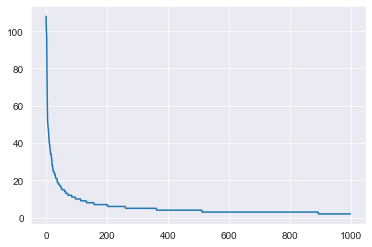

In [5]:
print(twitter_data["normalized_text"].value_counts())

sns.set_style("darkgrid")
plt.plot(list(twitter_data["normalized_text"].value_counts()[0:1000]))
plt.show()


Most common words:  [('0', 3820), ('good', 1592), ('day', 1411), ('get', 1267), ('like', 1198), ('work', 1157), ('quot', 1140), ('go', 1136), ('today', 1080), ('http', 1076), ('going', 1046), ('back', 1027), ('love', 929), ('com', 914), ('time', 905), ('got', 898), ('one', 854), ('lol', 854), ('u', 802), ('really', 734)]

Least common words:  [('teemonster', 1), ('ozzyuk', 1), ('hapiness', 1), ('thalia', 1), ('0kyv0', 1), ('coersive', 1), ('gardzina', 1), ('albeit', 1), ('t0c', 1), ('metallica', 1), ('gh', 1), ('stammy', 1), ('rstammy', 1), ('polo', 1), ('sherlock0', 1), ('loops', 1), ('spliffsstudio', 1), ('nvq', 1), ('fruity', 1), ('nameday', 1)]


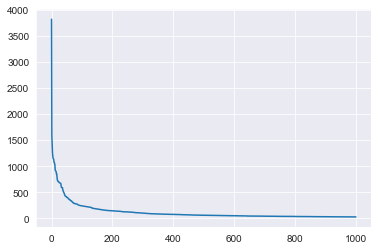

In [6]:
print("Most common words: ", wc.most_common(20))
print()
print("Least common words: ", wc.most_common()[:-20-1:-1])


sns.set_style("darkgrid")
plt.plot([i[1] for i in list(wc.most_common(1000))])
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

train_X, test_X, train_y, test_y = train_test_split(twitter_data["normalized_text"],twitter_data["target"],test_size = 0.33, random_state=0)

#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(train_X)
#applying tf idf to training data
X_train_tf = tf_idf.transform(train_X)

X_test_tf = tf_idf.transform(test_X)



scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=2, penalty='l2',max_iter=10000)
model=scikit_log_reg.fit(X_train_tf,train_y)

preds = model.predict(X_test_tf)
confidence_scores = model.predict_proba(X_test_tf).T[0]
accuracy = accuracy_score(test_y, preds)



model_metrics = pd.DataFrame({"normalized_text":list(test_X), "pred": list(preds), "actual":test_y, "confidence": confidence_scores})

model_metrics["is_correct"] = model_metrics["pred"] ==  model_metrics["actual"]

[LibLinear]

In [8]:
model_metrics

,normalized_text,pred,actual,confidence,is_correct
242160,ihavealottosay happy birthday hope wonderful day,1,1,0.006587,True
3413,bike pump dead,0,0,0.675051,True
393024,lisa tut thanks lovin fall weather rolled bout,1,1,0.346274,True
247987,juney boomdata remember 0rm alabama daddy club chloe brunq yu dwn 0 0 shows,1,1,0.309254,True
52436,really really misses,0,0,0.970361,True
...,...,...,...,...,...
239061,lionesskeeper give hugh jackman john barrowman version song,1,1,0.148209,True
237666,got money left crispen yesterday looking nice fresh,1,1,0.438636,True
40562,got little much vitamin today feeling consequences wearing sunscreen,0,0,0.670195,True
136654,finished watching grey finally face wet,1,0,0.390501,False


                                                                                                   0.000536
woke                                                                                               0.000301
know                                                                                               0.000167
raining                                                                                            0.000134
back home                                                                                          0.000134
                                                                                                     ...   
 caitlinbell0 dont follow                                                                          0.000033
 mhas0 hahah nah old dont fit eyes wear em                                                         0.000033
 rolyseal aww gttd lol oo also saw msg amp lks nice hw cm google mapsl leme st vu ther n nt sxx    0.000033
work early wee hours ergo mu

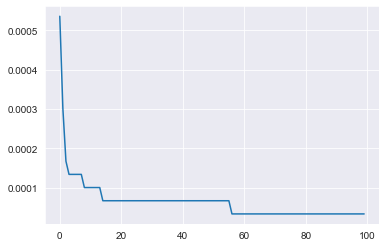

In [9]:
n_err_test = len(model_metrics[model_metrics["is_correct"] == False])
print(model_metrics[model_metrics["is_correct"] == False]["normalized_text"].value_counts()/n_err_test)

sns.set_style("darkgrid")
plt.plot(list(model_metrics[model_metrics["is_correct"] == False]["normalized_text"].value_counts()/n_err_test)[0:100])
plt.show()

In [10]:
import numpy as np
word_purity = twitter_data.sample(n = 20000)[["normalized_text", "target"]]
word_purity["normalized_text"] = word_purity["normalized_text"].apply(lambda x: x.split(" "))
word_purity = word_purity.explode("normalized_text")
print(word_purity["target"].value_counts())
word_purity = word_purity.groupby("normalized_text").agg({"target":"value_counts"})
word_purity.columns = ["count"]
word_purity = word_purity.unstack ("target").fillna(0)
word_purity.columns = ["count_0", "count_1"]
word_purity["total"] = word_purity["count_0"] + word_purity["count_1"] 
word_purity = word_purity[word_purity.total>10]

word_purity["cluster_purity"] = word_purity.apply(lambda x: (x["count_0"]/x["total"]) if (x["count_0"]/x["total"])>=0.5 else 1 -  (x["count_0"]/x["total"]),axis = 1)

1    90307
0    86832
Name: target, dtype: int64


In [11]:
word_purity.sort_values("cluster_purity")

,count_0,count_1,total,cluster_purity
normalized_text,,,,
flight,17.0,17.0,34.0,0.5
mentioned,7.0,7.0,14.0,0.5
vote,17.0,17.0,34.0,0.5
record,11.0,11.0,22.0,0.5
cell,9.0,9.0,18.0,0.5
...,...,...,...,...
crappy,19.0,0.0,19.0,1.0
diversity,0.0,12.0,12.0,1.0
stomach,29.0,0.0,29.0,1.0


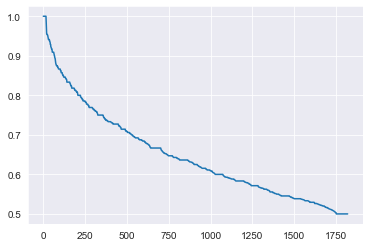

In [12]:


sns.set_style("darkgrid")
plt.plot(list(word_purity.sort_values("cluster_purity", ascending = False)["cluster_purity"]))
plt.show()

In [162]:
# sampling/representation/forgetfulness
# model drift/stats -> Accuracy drop - alert
# model diff
# schema validation


In [13]:
# Representation 1

training_sample = twitter_data[twitter_data["available_data"]][:2000]
training_wc = Counter(" ".join(training_sample["normalized_text"]).split())
population_wc = Counter(" ".join(twitter_data[twitter_data["available_data"]]["normalized_text"]).split())

training_wc = pd.DataFrame(training_wc.items(), columns = ["word", "count"])
population_wc = pd.DataFrame(population_wc.items(), columns = ["word", "count"])
training_wc["prob"] = training_wc["count"]/training_wc["count"].sum()
population_wc["prob"] = population_wc["count"]/population_wc["count"].sum()

In [14]:
diff = population_wc[population_wc["count"]>=500].merge(training_wc, on = "word", how = "left",  suffixes=('_population', '_sample')).fillna(0)
diff["percentage_abs_change"] = np.abs(diff["prob_population"] - diff["prob_sample"])/diff["prob_population"]

In [15]:
diff.sort_values("percentage_abs_change")

,word,count_population,prob_population,count_sample,prob_sample,percentage_abs_change
21,like,1198,0.006162,95,0.006099,0.010223
17,time,905,0.004655,70,0.004494,0.034572
1,day,1411,0.007257,118,0.007575,0.043820
2,hope,543,0.002793,46,0.002953,0.057374
8,quot,1140,0.005863,85,0.005457,0.069354
31,today,1080,0.005555,93,0.005970,0.074805
26,lol,854,0.004392,60,0.003852,0.123072
30,much,587,0.003019,53,0.003402,0.126959
27,see,675,0.003472,47,0.003017,0.130910
35,amp,680,0.003497,47,0.003017,0.137301


In [16]:

def calculate_accuracy(population, sample, train):
    
    train_X, test_X, train_y, test_y = train_test_split(sample["normalized_text"],sample["target"],test_size = 0.33, random_state=0)

    #tf idf
    
    tf_idf = TfidfVectorizer()
    
    #applying tf idf to training data
    
    X_train_tf = tf_idf.fit_transform(train["normalized_text"])
    

    sample_test_tf = tf_idf.transform(sample["normalized_text"])
    population_test_tf = tf_idf.transform(population["normalized_text"])


    scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=2, penalty='l2',max_iter=10000)
    model = scikit_log_reg.fit(X_train_tf, train["target"])

    accuracy_sample = accuracy_score(sample["target"], model.predict(sample_test_tf))
    accuracy_population = accuracy_score(population["target"], model.predict(population_test_tf))

 
        
    return (accuracy_sample, accuracy_population, population["target"] == model.predict(population_test_tf))


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

population, sample = train_test_split(twitter_data[twitter_data.available_data], test_size=0.8)
train, sample = train_test_split(sample[twitter_data.available_data], test_size=0.8)

tf_idf = TfidfVectorizer()
km = KMeans(
        n_clusters=5,
        init="k-means++",
        max_iter=100,
        n_init=1,
    )

population_tf = tf_idf.fit_transform(population["normalized_text"])
km.fit(population_tf)


population["clusters"] = km.predict(population_tf)

<ipython-input-17-02ef7a76e91b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train, sample = train_test_split(sample[twitter_data.available_data], test_size=0.8)


In [18]:
population.groupby("clusters")["normalized_text"].apply(lambda x: Counter(" ".join(list(x)).split()).most_common(10))

clusters
0    [(0, 539), (http, 199), (like, 185), (get, 180), (quot, 176), (com, 170), (go, 168), (going, 151), (back, 151), (love, 147)]
1                [(know, 147), (new, 109), (0, 37), (quot, 29), (one, 23), (let, 16), (lol, 15), (u, 15), (really, 14), (oh, 14)]
2          [(today, 180), (fun, 75), (0, 34), (good, 19), (day, 18), (going, 15), (get, 15), (night, 14), (home, 13), (back, 13)]
3       [(good, 288), (day, 211), (morning, 112), (0, 64), (night, 34), (get, 30), (time, 26), (great, 25), (im, 24), (hope, 24)]
4            [(work, 233), (0, 56), (day, 27), (back, 23), (good, 17), (go, 16), (got, 14), (like, 14), (today, 14), (still, 13)]
Name: normalized_text, dtype: object

In [ ]:
# w/o periodic model retraining

accuracies = []
cluster_accuracies = []
cluster_n = []

for date, sub_df in twitter_data[~twitter_data.available_data].groupby("date"):
    print(date)
    population = pd.concat([population, sub_df])

    population_tf = tf_idf.transform(population["normalized_text"])



    population["clusters"] = km.predict(population_tf)
    
    acc = list(calculate_accuracy(population, sample, train)) + [date]
    
    population["is_correct"] = acc[2]
    

    cluster_accuracies.append(population.groupby("clusters")["is_correct"].mean())
    cluster_n.append(population.groupby("clusters")["is_correct"].count())
    accuracies.append(acc[1])
    print(accuracies)
    print()

2009-05-01 00:00:00
[LibLinear][0.7218284391725734]

2009-05-02 00:00:00
[LibLinear][0.7218284391725734, 0.719371576823292]

2009-05-03 00:00:00
[LibLinear][0.7218284391725734, 0.719371576823292, 0.7180748287370455]

2009-05-04 00:00:00
[LibLinear][0.7218284391725734, 0.719371576823292, 0.7180748287370455, 0.7187277829747427]

2009-05-09 00:00:00
[LibLinear][0.7218284391725734, 0.719371576823292, 0.7180748287370455, 0.7187277829747427, 0.7198100178529323]

2009-05-10 00:00:00
[LibLinear][0.7218284391725734, 0.719371576823292, 0.7180748287370455, 0.7187277829747427, 0.7198100178529323, 0.7205764832318333]

2009-05-11 00:00:00
[LibLinear][0.7218284391725734, 0.719371576823292, 0.7180748287370455, 0.7187277829747427, 0.7198100178529323, 0.7205764832318333, 0.720451385174885]

2009-05-13 00:00:00
[LibLinear][0.7218284391725734, 0.719371576823292, 0.7180748287370455, 0.7187277829747427, 0.7198100178529323, 0.7205764832318333, 0.720451385174885, 0.720212378324918]

2009-05-14 00:00:00
[LibLi

In [ ]:


plt.figure(figsize=(15,8))
p = sns.lineplot(data =pd.DataFrame({"Accuracy on test data": [acc[0]]* len(accuracies), "Actual model performance over time": accuracies}))
plt.title("Model Accuracy over time")
p.set_xlabel("Days", fontsize = 20)
p.set_ylabel("Accuracy", fontsize = 20)

In [ ]:
cluster_accuracies_df = pd.DataFrame(cluster_accuracies).T

In [ ]:
cluster_accuracies_df.columns = range(len(cluster_accuracies_df.columns))

In [ ]:
cluster_accuracies_df



plt.figure(figsize=(15,8))
p = sns.lineplot(data =cluster_accuracies_df.T)
plt.title("Model Accuracy over time for each cluster")
p.set_xlabel("Days", fontsize = 20)
p.set_ylabel("Accuracy", fontsize = 20)